# Target의 dtype이 float이 아닌 int라면, 분류형인듯하여 분류형 모델의 성능을 비교하는 파일을 만들었습니다

In [115]:
import pandas as pd

# 데이터 불러오기 
data = pd.read_csv('/Users/jangjinseul/Desktop/SKN13/08_머신러닝/datasets/2010-new-york-state-hospital-inpatient-discharge/hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv')
data.head(10)
print(data.shape)

/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_98489/49964933.py:4: DtypeWarning: Columns (1,2,7,11,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/Users/jangjinseul/Desktop/SKN13/08_머신러닝/datasets/2010-new-york-state-hospital-inpatient-discharge/hospital-inpatient-discharges-sparcs-de-identified-2010-1.csv')


(2622133, 38)


In [ ]:
# 1. 문자열 등 비정상적인 값은 NaN으로 변환
data['Length of Stay'] = pd.to_numeric(data['Length of Stay'], errors='coerce')

# 2. NaN이 된 행은 제거
df = data.dropna(subset=['Length of Stay'])

# 3. float → int 로 형변환 (NaN 제거되었으므로 안전)
df['Length of Stay'] = df['Length of Stay'].astype(int)

print(df.shape, df['Length of Stay'].dtype)


(2619918, 38) int64


/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_98489/3003604707.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Length of Stay'] = df['Length of Stay'].astype(int)


KeyboardInterrupt: 

In [ ]:
# target 컬럼값 type 확인.
df['Length of Stay'].apply(type).value_counts()

Length of Stay
<class 'int'>    2619918
Name: count, dtype: int64

In [ ]:
# nan 개수
print(df.isna().sum())

index                                        0
Health Service Area                       4887
Hospital County                           4887
Operating Certificate Number              4887
Facility ID                               4887
Facility Name                                0
Age Group                                    0
Zip Code - 3 digits                       3195
Gender                                       0
Race                                         0
Ethnicity                                    0
Length of Stay                               0
Type of Admission                            0
Patient Disposition                        103
Discharge Year                               0
CCS Diagnosis Code                        2273
CCS Diagnosis Description                 2273
CCS Procedure Code                        2273
CCS Procedure Description                 2273
APR DRG Code                                 0
APR DRG Description                          0
APR MDC Code 

In [ ]:
# nan 개수가 만단위를 넘는 컬럼 삭제
nan_columns = df.columns[df.isna().sum() > 10_000]
df = df.drop(columns=nan_columns)
nan_columns, df.columns

(Index(['Source of Payment 2', 'Source of Payment 3',
        'Operating Provider License Number', 'Other Provider License Number'],
       dtype='object'),
 Index(['index', 'Health Service Area', 'Hospital County',
        'Operating Certificate Number', 'Facility ID', 'Facility Name',
        'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity',
        'Length of Stay', 'Type of Admission', 'Patient Disposition',
        'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description',
        'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code',
        'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
        'APR Severity of Illness Code', 'APR Severity of Illness Description',
        'APR Risk of Mortality', 'APR Medical Surgical Description',
        'Source of Payment 1', 'Attending Provider License Number',
        'Birth Weight', 'Abortion Edit Indicator',
        'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
   

In [ ]:
# Object type인 컬럼의 세부 dtype 확인 > nan은 float type
# float type의 개수와 nan 개수가 같음
for col in df.select_dtypes(include='object').columns:
    print(f"컬럼: {col}")
    print(df[col].apply(type).value_counts(), "\n")

컬럼: Health Service Area
Health Service Area
<class 'str'>      2615031
<class 'float'>       4887
Name: count, dtype: int64 

컬럼: Hospital County
Hospital County
<class 'str'>      2615031
<class 'float'>       4887
Name: count, dtype: int64 

컬럼: Facility Name
Facility Name
<class 'str'>    2619918
Name: count, dtype: int64 

컬럼: Age Group
Age Group
<class 'str'>    2619918
Name: count, dtype: int64 

컬럼: Zip Code - 3 digits
Zip Code - 3 digits
<class 'str'>      2060205
<class 'int'>       523790
<class 'float'>      35923
Name: count, dtype: int64 

컬럼: Gender
Gender
<class 'str'>    2619918
Name: count, dtype: int64 

컬럼: Race
Race
<class 'str'>    2619918
Name: count, dtype: int64 

컬럼: Ethnicity
Ethnicity
<class 'str'>    2619918
Name: count, dtype: int64 

컬럼: Type of Admission
Type of Admission
<class 'str'>    2619918
Name: count, dtype: int64 

컬럼: Patient Disposition
Patient Disposition
<class 'str'>      2619815
<class 'float'>        103
Name: count, dtype: int64 

컬럼: CCS

In [ ]:
# 컬럼별 타입 확인
# Total Charges, Total Costs > 이 두개 컬럼만 float
# 나머지 컬럼의 숫자 데이터는 모두 1로 나눠떨어진다. 실직적인 int >> 모두 범주형
df[df['Birth Weight'].fillna(0) % 1 != 0]

,index,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,Age Group,Zip Code - 3 digits,Gender,Race,...,APR Severity of Illness Description,APR Risk of Mortality,APR Medical Surgical Description,Source of Payment 1,Attending Provider License Number,Birth Weight,Abortion Edit Indicator,Emergency Department Indicator,Total Charges,Total Costs


In [ ]:
# 우편번호 컬럼 삭제
df = df.drop(columns=['Zip Code - 3 digits'])

In [ ]:
# index 컬럼 삭제
df = df.drop(columns=['index', 'Attending Provider License Number', 'Operating Certificate Number'])

In [ ]:
print(df.columns)

Index(['Health Service Area', 'Hospital County', 'Facility ID',
       'Facility Name', 'Age Group', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description',
       'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Source of Payment 1', 'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')


In [ ]:
df['Length of Stay']

0           1
1          15
2           3
3           5
4           4
           ..
2622128    29
2622129     1
2622130     4
2622131     1
2622132     1
Name: Length of Stay, Length: 2619918, dtype: int64

In [ ]:
pd.set_option('display.max_columns', None)
# df.head(10)
df.columns

Index(['Health Service Area', 'Hospital County', 'Facility ID',
       'Facility Name', 'Age Group', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description',
       'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code', 'APR Severity of Illness Description',
       'APR Risk of Mortality', 'APR Medical Surgical Description',
       'Source of Payment 1', 'Birth Weight', 'Abortion Edit Indicator',
       'Emergency Department Indicator', 'Total Charges', 'Total Costs'],
      dtype='object')

In [ ]:
# 고유값 개수 확인
df.nunique()

Health Service Area                          8
Hospital County                             57
Facility ID                                225
Facility Name                              225
Age Group                                    5
Gender                                       3
Race                                         4
Ethnicity                                    3
Length of Stay                             119
Type of Admission                            6
Patient Disposition                         19
Discharge Year                               1
CCS Diagnosis Code                         262
CCS Diagnosis Description                  262
CCS Procedure Code                         232
CCS Procedure Description                  232
APR DRG Code                               316
APR DRG Description                        316
APR MDC Code                                26
APR MDC Description                         26
APR Severity of Illness Code                 5
APR Severity 

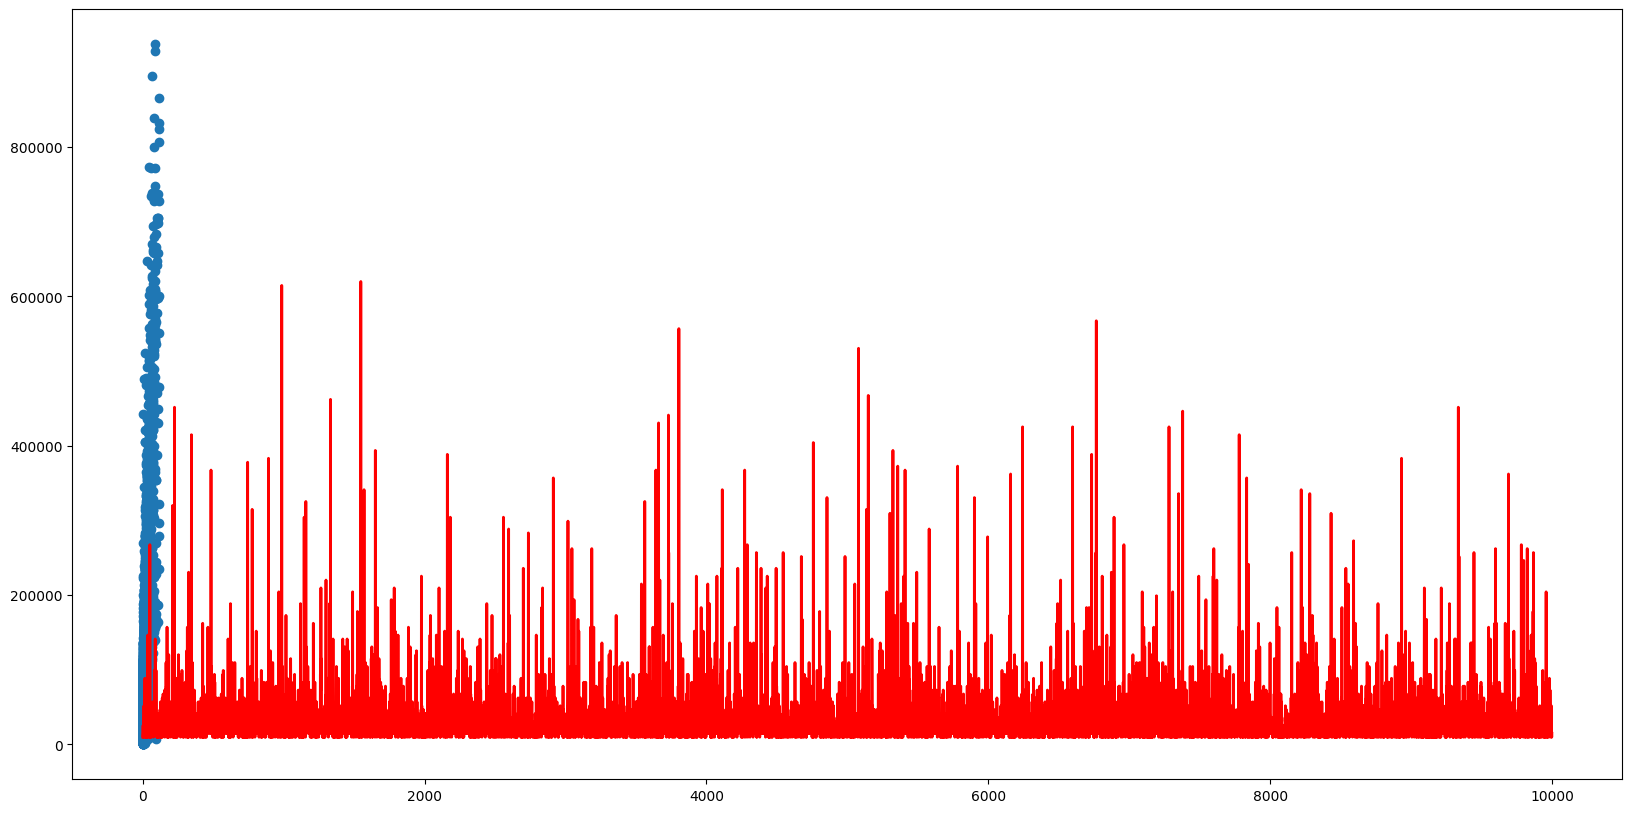

In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_test = df.dropna(subset=['Total Charges']).head(50000)
X_train, X_test, y_train, y_test = train_test_split(df_test[['Length of Stay']], df_test['Total Charges'], test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)

plt.figure(figsize=(20, 10))
plt.scatter(df_test['Length of Stay'], df_test['Total Charges'], marker='o')
plt.plot(pred, color='red', linewidth=2)
plt.show()  

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import KNNImputer, SimpleImputer

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:

# -------------------------------
# 대략적인 모델별 성능 비교
# -------------------------------

# 고유값이 만 단위 이상은 연속형, 나머진 범주형 + Birth Weight는 연속형
num_columns = ['Total Charges', 'Total Costs', 'Length of Stay', 'Birth Weight'] # 연속형 컬럼
cate_columns = [col for col in df.columns
                if col not in num_columns + ['Patient Disposition']] # 범주형 컬럼



In [ ]:

# -------------------------------
# 공통 전처리 파이프라인 구성
# -------------------------------
cat_pipeline = make_pipeline(
    SimpleImputer(strategy='most_frequent'),
    OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
)

num_pipeline = make_pipeline(
    KNNImputer(n_neighbors=5),
    StandardScaler()
)

preprocessor = ColumnTransformer([
    ('cat', cat_pipeline, cate_columns),
    ('num', num_pipeline, num_columns)
])


In [ ]:

# -------------------------------
# 데이터 분할
# -------------------------------
X = df.drop(columns=['Patient Disposition'])
y = np.where(df['Patient Disposition'].values == 'Left Against Medical Advice', 1, 0)


X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.05, test_size=0.001, random_state=42)


In [ ]:

# -------------------------------
# 사용할 회귀 모델 정의
# -------------------------------
models = {
    'LogisticRegression' : LogisticRegression(),
    # 'Linear Regression': LinearRegression(),
    # 'Ridge Regression': Ridge(),
    # 'Lasso Regression': Lasso(),
    # 'Decision Tree': DecisionTreeClassifier(),
    # 'Random Forest': RandomForestClassifier(),
    # 'Gradient Boosting': GradientBoostingRegressor(),
    # 'Support Vector Regression': SVR()
}


In [ ]:

# -------------------------------
# 모델 학습 및 성능 비교
# -------------------------------

results = []
target_model = None
print("="*20, "이진 분류 모델 성능 비교", "="*20)
for name, model in models.items():
    pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred_proba = pipeline.predict_proba(X_test)
    y_pred = np.where(y_pred_proba[:, 1] > 0.3, 1, 0)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)

    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

    print(f"[{name}] Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")

    target_model = model
    


==================== 이진 분류 모델 성능 비교 ====================
[LogisticRegression] Accuracy: 0.9794, Precision: 0.3000, Recall: 0.0600, F1 Score: 0.1000


/Users/jangjinseul/miniconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# -------------------------------
# 결과 정리 출력
# -------------------------------
results_df = pd.DataFrame(results).sort_values(by='F1 Score', ascending=False)
print("\n📊 분류 모델 성능 요약 (F1 Score 기준 정렬):")
print(results_df)




📊 분류 모델 성능 요약 (F1 Score 기준 정렬):
                Model  Accuracy  Precision  Recall  F1 Score
0  LogisticRegression  0.979389        0.3    0.06       0.1


confusion_matrix(y 실제값, y 예측값)
recall_score(y 실제값, y 예측값)
precision_score(y 실제값, y 예측값)
f1_score(y 실제값, y 예측값)
classification_report(y 실제값, y 예측값)


In [ ]:
from sklearn.metrics import (
        confusion_matrix,
        ConfusionMatrixDisplay, # confusion matrix 시각화클래스
        accuracy_score,
        recall_score, 
        precision_score,
        f1_score,
        classification_report
)

In [ ]:
##### DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# 모델 생성
tree = DecisionTreeClassifier(max_depth=3)

# pipeline 구성 (preprocessor + model)
tree_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # 반드시 사전 구성한 전처리 파이프라인 사용
    ('tree', tree)
])

# 학습
tree_pipeline.fit(X_train, y_train)

# 추론
pred_train_tree = tree_pipeline.predict(X_train)
pred_test_tree = tree_pipeline.predict(X_test)

# 성능 평가
print("Train Accuracy:", accuracy_score(y_train, pred_train_tree))
print("Test Accuracy:", accuracy_score(y_test, pred_test_tree))


Train Accuracy: 0.9847627772052369
Test Accuracy: 0.9874045801526717


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# 혼동행렬 계산
cm = confusion_matrix(y_test, pred_test_tree)

# 혼동행렬의 각 요소
TN, FP, FN, TP = cm.ravel()

# 성능지표 계산
accuracy = accuracy_score(y_test, pred_test_tree)
precision = precision_score(y_test, pred_test_tree, zero_division=0)
recall = recall_score(y_test, pred_test_tree, zero_division=0)  # sensitivity와 동일
f1 = f1_score(y_test, pred_test_tree, zero_division=0)
specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
fall_out = FP / (FP + TN) if (FP + TN) > 0 else 0

# 결과 출력
print("📊 분류 성능 평가")
print(f"Accuracy    : {accuracy:.4f}")
print(f"Precision   : {precision:.4f}")
print(f"Recall      : {recall:.4f} (Sensitivity)")
print(f"F1 Score    : {f1:.4f}")
print(f"Specificity : {specificity:.4f}")
print(f"Fall out    : {fall_out:.4f}")


📊 분류 성능 평가
Accuracy    : 0.9874
Precision   : 1.0000
Recall      : 0.3400 (Sensitivity)
F1 Score    : 0.5075
Specificity : 1.0000
Fall out    : 0.0000


In [ ]:
# Confusion Matrix
cm_train = confusion_matrix(y_train, pred_train_tree)
cm_test =  confusion_matrix(y_test, pred_test_tree)

print(f"train set\n{cm_train}")
print("-"* 20)
print(f"test set\n{cm_test}")

train set
[[128158      0]
 [  1996    841]]
--------------------
test set
[[2570    0]
 [  33   17]]


In [ ]:
# train set
TN_train, FP_train, FN_train, TP_train = 1922241, 0, 29797, 12900

accuracy_train = (TP_train + TN_train) / (TP_train + TN_train + FP_train + FN_train)
precision_train = TP_train / (TP_train + FP_train) if (TP_train + FP_train) > 0 else 0
recall_train = TP_train / (TP_train + FN_train)
f1_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)
specificity_train = TN_train / (TN_train + FP_train)
fall_out_train = FP_train / (FP_train + TN_train)

print("📌 Train set 결과")
print("-"*30)
print(f"Accuracy: {accuracy_train:.4f}")
print(f"Precision: {precision_train:.4f}")
print(f"Recall: {recall_train:.4f}")
print(f"F1 Score: {f1_train:.4f}")
print(f"Specificity: {specificity_train:.4f}")
print(f"Fall out: {fall_out_train:.4f}")

print("-"*30)


📌 Train set 결과
------------------------------
Accuracy: 0.9848
Precision: 1.0000
Recall: 0.3021
F1 Score: 0.4641
Specificity: 1.0000
Fall out: 0.0000
------------------------------


In [ ]:
# test set
TN_test, FP_test, FN_test, TP_test = 640748, 0, 9882, 4350

accuracy_test = (TP_test + TN_test) / (TP_test + TN_test + FP_test + FN_test)
precision_test = TP_test / (TP_test + FP_test) if (TP_test + FP_test) > 0 else 0
recall_test = TP_test / (TP_test + FN_test)
f1_test = 2 * (precision_test * recall_test) / (precision_test + recall_test)
specificity_test = TN_test / (TN_test + FP_test)
fall_out_test = FP_test / (FP_test + TN_test)

print("📌 Test set 결과")
print("-"*30)
print(f"Accuracy: {accuracy_test:.4f}")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1 Score: {f1_test:.4f}")
print(f"Specificity: {specificity_test:.4f}")
print(f"Fall out: {fall_out_test:.4f}")

print("-"*30)

📌 Test set 결과
------------------------------
Accuracy: 0.9849
Precision: 1.0000
Recall: 0.3056
F1 Score: 0.4682
Specificity: 1.0000
Fall out: 0.0000
------------------------------


In [ ]:
# 정확도
print("DecisionTree 정확도(Accuracy)")
print(f"Trainset : {accuracy_score(y_train, pred_train_tree)},Testset: {accuracy_score(y_test, pred_test_tree)}")

# 정밀도
print("DecsionTree 정밀도(Precision) - 1기준")
print(f"Trainset : {precision_score(y_train, pred_train_tree)}, Testset: {precision_score(y_test, pred_test_tree)}")

# 재현율
print("DecisionTree 재현율(Recall)")
print(f"Trainset : {recall_score(y_train, pred_train_tree)}, Testset: {recall_score(y_test, pred_test_tree)}")

# F1 score
print("DecisionTree F1 score")
print(f"Trainset : {f1_score(y_train, pred_train_tree)}, Testset: {f1_score(y_test, pred_test_tree)}")

DecisionTree 정확도(Accuracy)
Trainset : 0.9847627772052369,Testset: 0.9874045801526717
DecsionTree 정밀도(Precision) - 1기준
Trainset : 1.0, Testset: 1.0
DecisionTree 재현율(Recall)
Trainset : 0.29643990130419456, Testset: 0.34
DecisionTree F1 score
Trainset : 0.4573137574768896, Testset: 0.5074626865671642


In [ ]:
print("---------------Train set Classification Report---------------")
print(classification_report(y_train, pred_train_tree))

---------------Train set Classification Report---------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    128158
           1       1.00      0.30      0.46      2837

    accuracy                           0.98    130995
   macro avg       0.99      0.65      0.72    130995
weighted avg       0.98      0.98      0.98    130995



In [ ]:
print("---------------Test set Classification Report---------------")
print(classification_report(y_test, pred_test_tree))

---------------Test set Classification Report---------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2570
           1       1.00      0.34      0.51        50

    accuracy                           0.99      2620
   macro avg       0.99      0.67      0.75      2620
weighted avg       0.99      0.99      0.98      2620



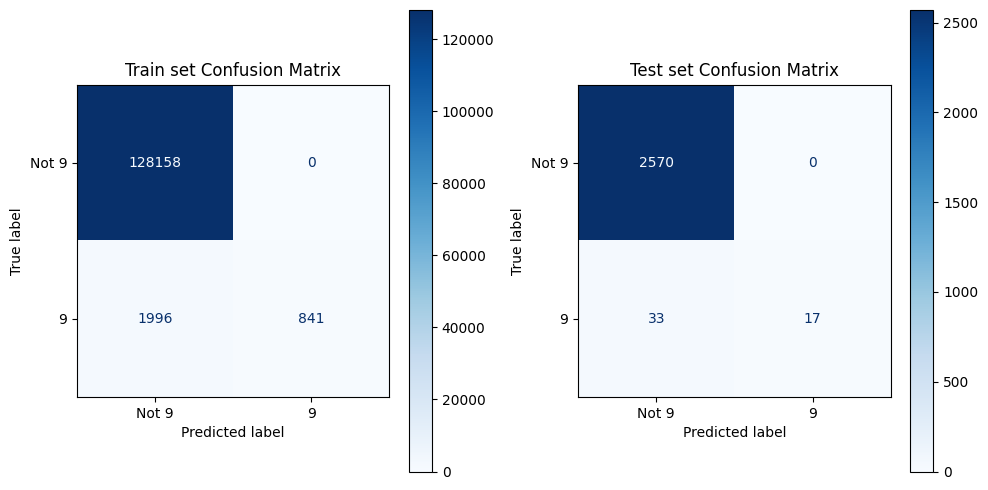

In [ ]:
# -------------------------------
# 시각화 출력
# -------------------------------

import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

disp_train = ConfusionMatrixDisplay(
    cm_train, #confusion matrix
    display_labels=['Not 9', '9']       # [음성레이블, 양성레이블]
)
disp_train.plot(cmap='Blues', ax=ax1)    # 출력

disp_test = ConfusionMatrixDisplay(
    cm_test, #confusion matrix
    display_labels=['Not 9', '9']) 

disp_test.plot(cmap='Blues', ax=ax2)

ax1.set_title("Train set Confusion Matrix")
ax2.set_title("Test set Confusion Matrix")
plt.tight_layout()
plt.show()

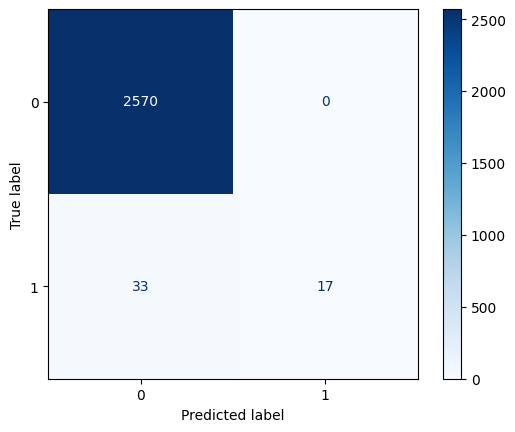

In [ ]:
disp_test = ConfusionMatrixDisplay(cm_test) 
disp_test.plot(cmap="Blues");

In [ ]:
###### RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# 모델 생성
rfc = RandomForestClassifier(n_estimators=200, max_depth=6, random_state=0)

# 파이프라인 구성 (preprocessor + RFC)
rfc_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # 이전에 정의한 전처리 파이프라인 사용
    ('rfc', rfc)
])

# 학습 (preprocessor 자동 적용)
rfc_pipeline.fit(X_train, y_train)

# 추론 (전처리 자동 적용됨)
pred_train_rfc = rfc_pipeline.predict(X_train)
pred_test_rfc = rfc_pipeline.predict(X_test)

# 정확도 등 평가 가능
from sklearn.metrics import accuracy_score
print("Train Accuracy:", accuracy_score(y_train, pred_train_rfc))
print("Test Accuracy:", accuracy_score(y_test, pred_test_rfc))

Train Accuracy: 0.9847627772052369
Test Accuracy: 0.9874045801526717


In [ ]:
# Confusion Matrix
cm_train_rfc = confusion_matrix(y_train, pred_train_rfc)
cm_train_rfc

array([[128158,      0],
       [  1996,    841]])

/Users/jangjinseul/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jangjinseul/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50808 (\N{HANGUL SYLLABLE OE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jangjinseul/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 49707 (\N{HANGUL SYLLABLE SUS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jangjinseul/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 51088 (\N{HANGUL SYLLABLE JA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


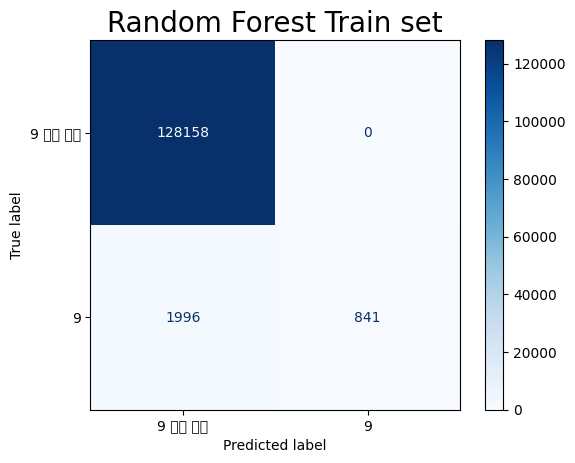

In [ ]:
## Confusion Matrix Display
# 시각화 - matplotlib 를 이용해 plotting
### Trainset Confusion Matrix만 시각화.
cm_display2 = ConfusionMatrixDisplay(cm_train_rfc, display_labels=["9 이외 숫자", "9"])
cm_display2.plot(cmap="Blues")
plt.title("Random Forest Train set", fontsize=20)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Patient Disposition'])
y = np.where(df['Patient Disposition'] == 'Left Against Medical Advice', 1, 0)

# train_size=0.05로 줄인 적이 있다면 동일하게 유지하세요
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.05, test_size=0.02, random_state=42, stratify=y
)

print("훈련셋 크기:", X_train.shape, y_train.shape)
print("테스트셋 크기:", X_test.shape, y_test.shape)

훈련셋 크기: (130995, 29) (130995,)
테스트셋 크기: (52399, 29) (52399,)


In [ ]:
# 예측
pred_train_rfc = rfc_pipeline.predict(X_train)
pred_test_rfc = rfc_pipeline.predict(X_test)

# 혼동 행렬
from sklearn.metrics import confusion_matrix

cm_train = confusion_matrix(y_train, pred_train_rfc)
cm_test = confusion_matrix(y_test, pred_test_rfc)

# 이어서 ravel()하고 지표 계산


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# 혼동행렬 계산
cm_train = confusion_matrix(y_train, pred_train_rfc)
TN_train, FP_train, FN_train, TP_train = cm_train.ravel()

cm_test = confusion_matrix(y_test, pred_test_rfc)
TN_test, FP_test, FN_test, TP_test = cm_test.ravel()

# 성능지표 계산 (Train)
accuracy_train = accuracy_score(y_train, pred_train_rfc)
precision_train = precision_score(y_train, pred_train_rfc, zero_division=0)
recall_train = recall_score(y_train, pred_train_rfc, zero_division=0)
f1_train = f1_score(y_train, pred_train_rfc, zero_division=0)
specificity_train = TN_train / (TN_train + FP_train)
fall_out_train = FP_train / (FP_train + TN_train)

# 성능지표 계산 (Test)
accuracy_test = accuracy_score(y_test, pred_test_rfc)
precision_test = precision_score(y_test, pred_test_rfc, zero_division=0)
recall_test = recall_score(y_test, pred_test_rfc, zero_division=0)
f1_test = f1_score(y_test, pred_test_rfc, zero_division=0)
specificity_test = TN_test / (TN_test + FP_test)
fall_out_test = FP_test / (FP_test + TN_test)


In [ ]:

# 결과 출력
print("📊 RandomForestClassifier 성능 평가 결과")

print("📌 Train set 결과")
print("-"*30)
print(f"Accuracy    : {accuracy_train:.4f}")
print(f"Precision   : {precision_train:.4f}")
print(f"Recall      : {recall_train:.4f}")
print(f"F1 Score    : {f1_train:.4f}")
print(f"Specificity : {specificity_train:.4f}")
print(f"Fall out    : {fall_out_train:.4f}")
print("-"*30)



📊 RandomForestClassifier 성능 평가 결과
📌 Train set 결과
------------------------------
Accuracy    : 0.9848
Precision   : 1.0000
Recall      : 0.2997
F1 Score    : 0.4612
Specificity : 1.0000
Fall out    : 0.0000
------------------------------


In [ ]:


print("📌 Test set 결과")
print("-"*30)
print(f"Accuracy    : {accuracy_test:.4f}")
print(f"Precision   : {precision_test:.4f}")
print(f"Recall      : {recall_test:.4f}")
print(f"F1 Score    : {f1_test:.4f}")
print(f"Specificity : {specificity_test:.4f}")
print(f"Fall out    : {fall_out_test:.4f}")
print("-"*30)

📌 Test set 결과
------------------------------
Accuracy    : 0.9850
Precision   : 1.0000
Recall      : 0.3099
F1 Score    : 0.4732
Specificity : 1.0000
Fall out    : 0.0000
------------------------------


In [ ]:
from sklearn.pipeline import Pipeline

# 전처리 포함 파이프라인으로 모델 정의
tree_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # 전처리 포함
    ('tree', DecisionTreeClassifier(max_depth=3, random_state=0))
])

# 학습
tree_pipeline.fit(X_train, y_train)

# 확률 예측 (전처리 포함된 pipeline에서 실행해야 함)
pred_tree_proba = tree_pipeline.predict_proba(X_test)  # [[P(0), P(1)]]
print(pred_tree_proba[:5])

# 1(양성)일 확률만 추출
pred_tree_pos_proba = pred_tree_proba[:, 1]
print(pred_tree_pos_proba[:5])

# 임계값 조정
thresh = 0.1
pred_test_tree_thresh = np.where(pred_tree_pos_proba >= thresh, 1, 0)
print(pred_test_tree_thresh[:15])


[[0.99107943 0.00892057]
 [0.99107943 0.00892057]
 [0.93302964 0.06697036]
 [0.99107943 0.00892057]
 [0.99107943 0.00892057]]
[0.00892057 0.00892057 0.06697036 0.00892057 0.00892057]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [ ]:
# 전처리 포함 pipeline 사용
tree_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeClassifier(max_depth=3, random_state=0))
])

# 학습
tree_pipeline.fit(X_train, y_train)

# 확률 예측
y_proba_tree = tree_pipeline.predict_proba(X_test)[:, 1]  # P(양성 클래스)


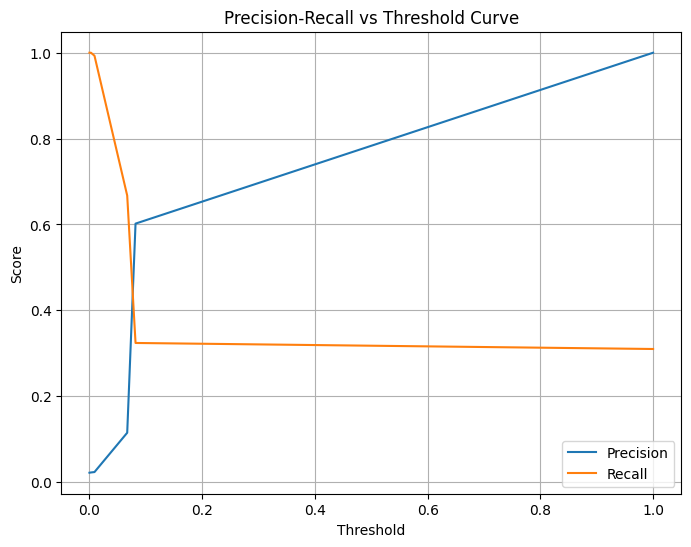

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precisions, recalls, thresholds_pr = precision_recall_curve(y_test, y_proba_tree)

plt.figure(figsize=(8, 6))
plt.plot(thresholds_pr, precisions[:-1], label='Precision')
plt.plot(thresholds_pr, recalls[:-1], label='Recall')
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision-Recall vs Threshold Curve")
plt.legend()
plt.grid()
plt.show()


In [ ]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

def print_binary_classification_metrics(y_true, y_pred, title=""):
    print(f"\n📊 분류 성능 평가 - {title}")
    print("-" * 40)

    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, zero_division=0)
    rec = recall_score(y_true, y_pred, zero_division=0)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    fallout = fp / (fp + tn) if (fp + tn) > 0 else 0

    print(f"Accuracy    : {acc:.4f}")
    print(f"Precision   : {prec:.4f}")
    print(f"Recall      : {rec:.4f}")
    print(f"F1 Score    : {f1:.4f}")
    print(f"Specificity : {specificity:.4f}")
    print(f"Fall-out    : {fallout:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=["Not Left AMA", "Left AMA"]))


In [ ]:
print_binary_classification_metrics(y_test, pred_test_tree_thresh, "임계값: 0.1")



📊 분류 성능 평가 - 임계값: 0.1
----------------------------------------
Accuracy    : 0.9850
Precision   : 1.0000
Recall      : 0.3099
F1 Score    : 0.4732
Specificity : 1.0000
Fall-out    : 0.0000

Classification Report:
              precision    recall  f1-score   support

Not Left AMA       0.98      1.00      0.99     51260
    Left AMA       1.00      0.31      0.47      1139

    accuracy                           0.98     52399
   macro avg       0.99      0.65      0.73     52399
weighted avg       0.99      0.98      0.98     52399



In [ ]:
pred_test_tree_05 = (pred_tree_pos_proba >= 0.5).astype(int)
print_binary_classification_metrics(y_test, pred_test_tree_05, "임계값: 0.5")



📊 분류 성능 평가 - 임계값: 0.5
----------------------------------------
Accuracy    : 0.9850
Precision   : 1.0000
Recall      : 0.3099
F1 Score    : 0.4732
Specificity : 1.0000
Fall-out    : 0.0000

Classification Report:
              precision    recall  f1-score   support

Not Left AMA       0.98      1.00      0.99     51260
    Left AMA       1.00      0.31      0.47      1139

    accuracy                           0.98     52399
   macro avg       0.99      0.65      0.73     52399
weighted avg       0.99      0.98      0.98     52399



In [ ]:
precisions

[0.02173705605068799,
 0.11483831973405863,
 0.11483831973405863,
 0.11483831973405863,
 0.11483831973405863,
 0.11483831973405863,
 0.11483831973405863,
 0.601957585644372,
 0.601957585644372,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [ ]:
recalls

[1.0,
 0.6672519754170325,
 0.6672519754170325,
 0.6672519754170325,
 0.6672519754170325,
 0.6672519754170325,
 0.6672519754170325,
 0.32396839332748023,
 0.32396839332748023,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.3099209833187006,
 0.30

In [ ]:
thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [ ]:
import pandas as pd
prc_df = pd.DataFrame({
    "threshold":thresholds,
    "recall": recalls,
    "precision": precisions
})
prc_df.set_index('threshold', inplace=True)
# pd.set_option('display.max_rows', None)
prc_df
# threshold가 커지면 precision이 올라가고 recall은 떨어진다.
# threshold가 작아지면 recall이 올라가고 precision은 떨어진다.



#### 0.09 에서 precision이 1이 된다. 

,recall,precision
threshold,,
0.00,1.000000,0.021737
0.01,0.667252,0.114838
0.02,0.667252,0.114838
0.03,0.667252,0.114838
0.04,0.667252,0.114838
...,...,...
0.96,0.309921,1.000000
0.97,0.309921,1.000000
0.98,0.309921,1.000000


In [ ]:
prc_df.loc[0.09]


recall       0.309921
precision    1.000000
Name: 0.09, dtype: float64

In [ ]:
# 0.1 이상 0.3 이하 구간만 보기
prc_df.loc[0.07:0.11]


,recall,precision
threshold,,
0.07,0.323968,0.601958
0.08,0.323968,0.601958
0.09,0.309921,1.000000
0.10,0.309921,1.000000
0.11,0.309921,1.000000


In [ ]:
# recall 값이 0.8 이상인 행만 필터링
high_recall_df = prc_df[prc_df['recall'] >= 0.8]

# 결과 확인
print(high_recall_df)


           recall  precision
threshold                   
0.0           1.0   0.021737


In [ ]:
high_recall_precision_df = prc_df[
    (prc_df['recall'] >= 0.8) & (prc_df['precision'] >= 0.2)
]

print(high_recall_precision_df)


Empty DataFrame
Columns: [recall, precision]
Index: []


In [ ]:
# f1 점수를 직접 계산하여 데이터프레임에 추가
prc_df['f1'] = 2 * (prc_df['precision'] * prc_df['recall']) / (prc_df['precision'] + prc_df['recall'] + 1e-10)

# f1이 최대인 threshold 확인
best_f1_row = prc_df.loc[prc_df['f1'].idxmax()]
print("📌 F1 Score가 가장 높은 threshold 정보:")
print(best_f1_row)


📌 F1 Score가 가장 높은 threshold 정보:
recall       0.309921
precision    1.000000
f1           0.473190
Name: 0.09, dtype: float64


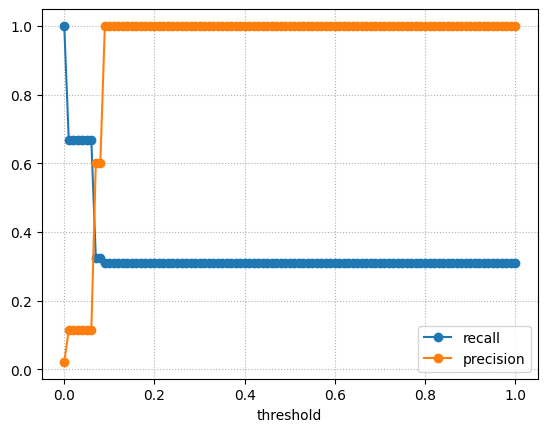

In [ ]:
prc_df.plot(marker='o');
plt.grid(True, linestyle=":")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# 사용할 임계값 리스트 (0 ~ 1까지 0.01 단위)
thresholds = np.arange(0.0, 1.01, 0.01)

# 결과 저장용 리스트
precisions, recalls, f1s, specificities, fallouts = [], [], [], [], []

for thresh in thresholds:
    y_pred_thresh = (pred_tree_pos_proba >= thresh).astype(int)
    
    # 기본 지표
    precisions.append(precision_score(y_test, y_pred_thresh, zero_division=0))
    recalls.append(recall_score(y_test, y_pred_thresh, zero_division=0))
    f1s.append(f1_score(y_test, y_pred_thresh, zero_division=0))

    # 혼동 행렬에서 Specificity, Fall-out 계산
    cm = confusion_matrix(y_test, y_pred_thresh)
    tn, fp, fn, tp = cm.ravel()
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    fallout = fp / (fp + tn) if (fp + tn) > 0 else 0
    specificities.append(specificity)
    fallouts.append(fallout)


In [ ]:
# plt.figure(figsize=(12, 7))
# plt.plot(thresholds, precisions, label='Precision')
# plt.plot(thresholds, recalls, label='Recall')
# plt.plot(thresholds, f1s, label='F1 Score')
# plt.plot(thresholds, specificities, label='Specificity')
# plt.plot(thresholds, fallouts, label='Fall-out')

# plt.axvline(0.5, color='gray', linestyle='--', label='Threshold = 0.5')
# plt.xlabel("Threshold")
# plt.ylabel("Score")
# plt.title("📊 성능 지표 vs 임계값 변화 곡선")
# plt.legend()
# plt.grid()
# plt.tight_layout()
# plt.show()


In [ ]:
##### DecisionTree의 PrecisionRecall 커브 그리기 + AP Score 계산.
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, average_precision_score
import matplotlib.pyplot as plt


# DecisionTree 파이프라인에서 확률 예측
test_proba_tree = tree_pipeline.predict_proba(X_test)[:, 1]

# RandomForest 파이프라인에서 확률 예측
test_proba_rfc = rfc_pipeline.predict_proba(X_test)[:, 1]

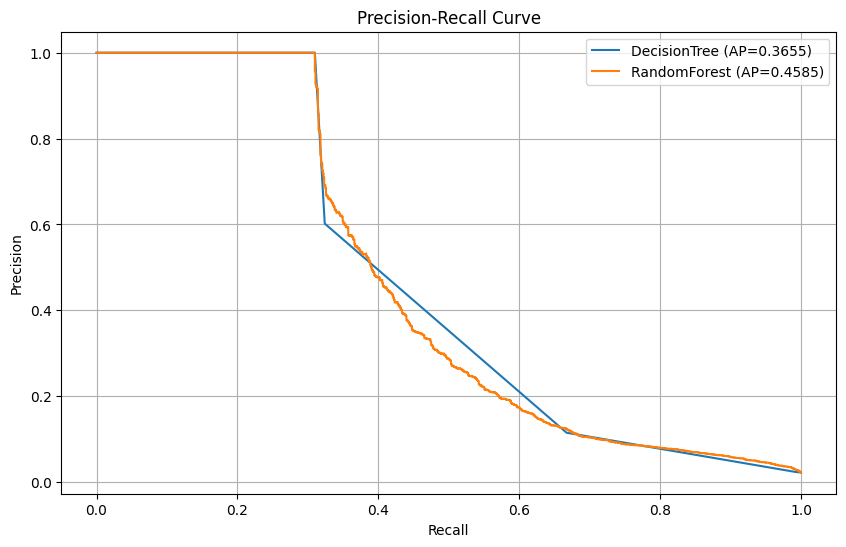

In [ ]:
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay, average_precision_score
import matplotlib.pyplot as plt

# 확률 예측 (pipeline 기반)
test_proba_tree = tree_pipeline.predict_proba(X_test)[:, 1]
test_proba_rfc = rfc_pipeline.predict_proba(X_test)[:, 1]

# Precision-Recall curve
prec_tree, rec_tree, _ = precision_recall_curve(y_test, test_proba_tree)
prec_rfc, rec_rfc, _ = precision_recall_curve(y_test, test_proba_rfc)

# Average Precision Score (AP Score)
ap_tree = average_precision_score(y_test, test_proba_tree)
ap_rfc = average_precision_score(y_test, test_proba_rfc)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(rec_tree, prec_tree, label=f"DecisionTree (AP={ap_tree:.4f})")
plt.plot(rec_rfc, prec_rfc, label=f"RandomForest (AP={ap_rfc:.4f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()


In [111]:
from sklearn.metrics import precision_recall_curve, average_precision_score, PrecisionRecallDisplay
import matplotlib.pyplot as plt


In [112]:
# RandomForestClassifier 확률 예측
proba_rfc = rfc_pipeline.predict_proba(X_test)[:, 1]  # 양성 클래스 확률


In [113]:
# Precision-Recall 곡선 계산
precision, recall, thresholds = precision_recall_curve(y_test, proba_rfc)

# AP Score 계산
ap_score = average_precision_score(y_test, proba_rfc)
print(f"📌 Average Precision (AP) Score: {ap_score:.4f}")


📌 Average Precision (AP) Score: 0.4585


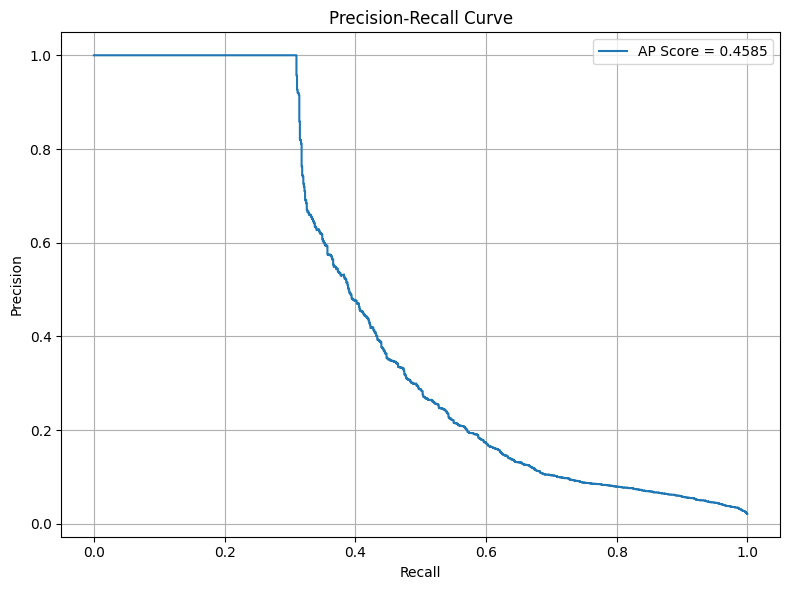

In [114]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f"AP Score = {ap_score:.4f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

fpr, tpr, thresholds_roc = roc_curve(y_test, y_proba_tree)
auc_score = roc_auc_score(y_test, y_proba_tree)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], 'k--')  # 기준선
plt.xlabel("False Positive Rate (Fall-out)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend()
plt.grid()
plt.show()


/Users/jangjinseul/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


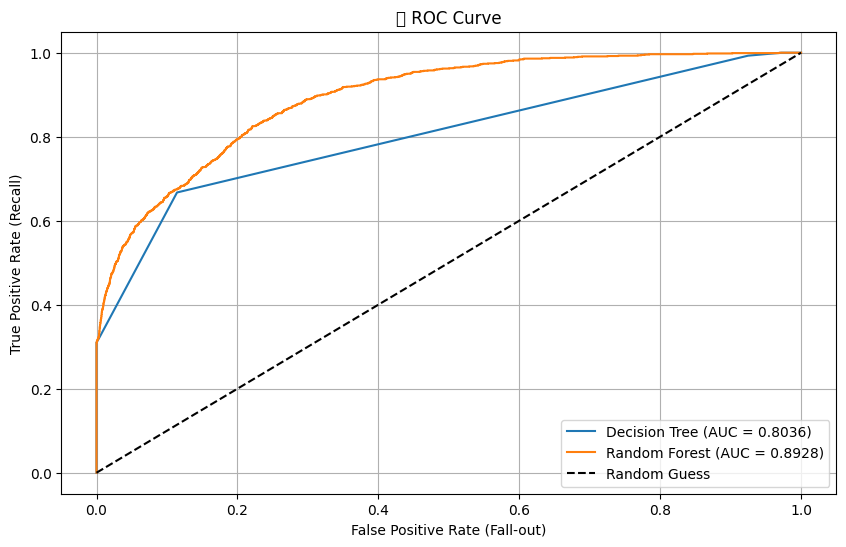

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 확률 예측 (pipeline 기반)
test_proba_tree = tree_pipeline.predict_proba(X_test)[:, 1]
test_proba_rfc = rfc_pipeline.predict_proba(X_test)[:, 1]

# ROC Curve
fpr_tree, tpr_tree, _ = roc_curve(y_test, test_proba_tree)
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, test_proba_rfc)

# AUC Score
auc_tree = roc_auc_score(y_test, test_proba_tree)
auc_rfc = roc_auc_score(y_test, test_proba_rfc)

# 시각화
plt.figure(figsize=(10, 6))
plt.plot(fpr_tree, tpr_tree, label=f"Decision Tree (AUC = {auc_tree:.4f})")
plt.plot(fpr_rfc, tpr_rfc, label=f"Random Forest (AUC = {auc_rfc:.4f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")  # 대각선 기준선

plt.xlabel("False Positive Rate (Fall-out)")
plt.ylabel("True Positive Rate (Recall)")
plt.title("📊 ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


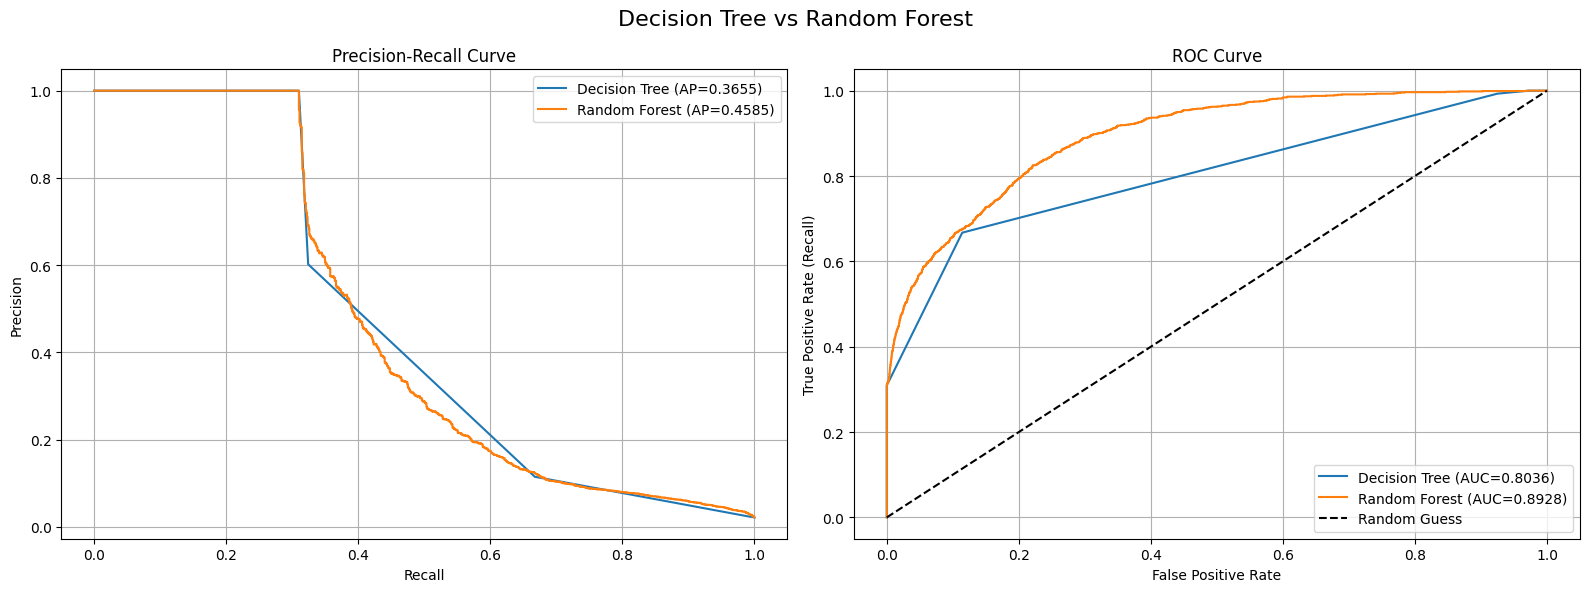

In [109]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score

# threshold 후보
thresholds = np.arange(0.0, 1.01, 0.01)

# 결과 저장
precisions = []
recalls = []
f1s = []

for thresh in thresholds:
    preds_thresh = (proba_rfc >= thresh).astype(int)  # RFC 기준 (원하시면 tree로 바꿔도 됨)
    
    precisions.append(precision_score(y_test, preds_thresh, zero_division=0))
    recalls.append(recall_score(y_test, preds_thresh, zero_division=0))
    f1s.append(f1_score(y_test, preds_thresh, zero_division=0))

# F1 Score 최대일 때의 threshold
best_idx = np.argmax(f1s)
best_thresh = thresholds[best_idx]
best_f1 = f1s[best_idx]


/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_98489/3702791693.py:17: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_98489/3702791693.py:17: UserWarning: Glyph 48324 (\N{HANGUL SYLLABLE BYEOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_98489/3702791693.py:17: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/5n/23r0_lzd78l_tlx8j_f6613w0000gn/T/ipykernel_98489/3702791693.py:17: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/jangjinseul/miniconda3/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/jan

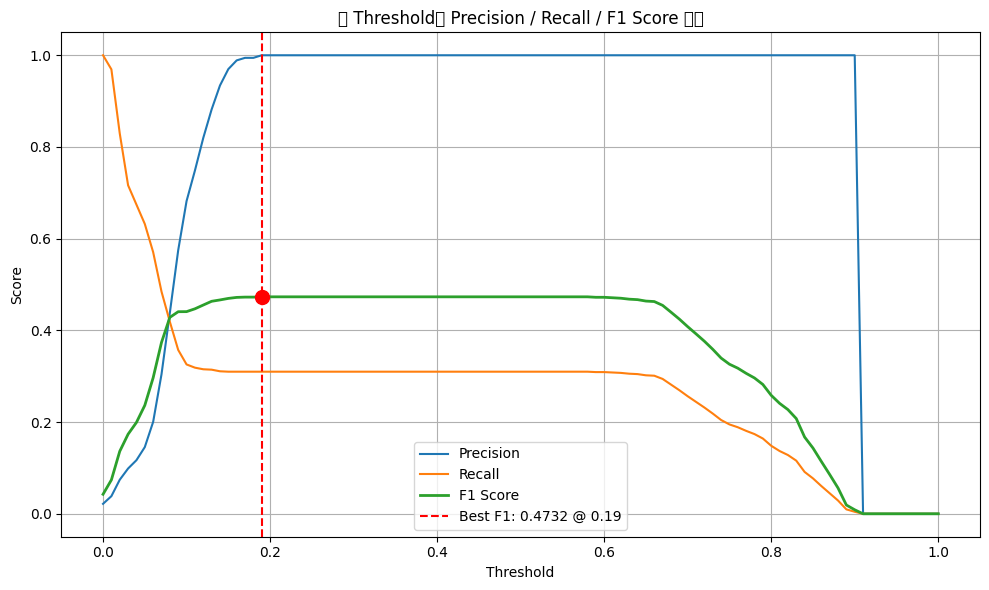

In [110]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision")
plt.plot(thresholds, recalls, label="Recall")
plt.plot(thresholds, f1s, label="F1 Score", linewidth=2)

# 최적 threshold 마커 표시
plt.axvline(best_thresh, color='red', linestyle='--', label=f'Best F1: {best_f1:.4f} @ {best_thresh:.2f}')
plt.scatter([best_thresh], [best_f1], color='red', s=100, zorder=5)

plt.title("📈 Threshold별 Precision / Recall / F1 Score 변화")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [108]:
import pickle
import os

saved_dir = 'models'
with open(os.path.join(saved_dir, 'TotalProfit_rfr_model.pkl'), 'wb') as fw:
    pickle.dump(target_model, fw)

FileNotFoundError: [Errno 2] No such file or directory: 'models/TotalProfit_rfr_model.pkl'

In [ ]:
import pandas as pd
import numpy as np

imp_df = pd.DataFrame(target_model.feature_importances_)

imp_df.sort_values(by=0, ascending=False).head(10)


,0
12,0.176529
24,0.093962
25,0.093472
13,0.091837
23,0.078753
8,0.050192
15,0.040148
6,0.037940
1,0.037121
9,0.036161


In [ ]:
df.columns[[12, 24, 25, 13, 23, 8, 15, 6, 1, 9]]

Index(['Discharge Year', 'APR Medical Surgical Description',
       'Source of Payment 1', 'CCS Diagnosis Code', 'APR Risk of Mortality',
       'Ethnicity', 'CCS Procedure Code', 'Gender', 'Hospital County',
       'Length of Stay'],
      dtype='object')

In [ ]:
import matplotlib.pyplot as plt

mse

# plt.figure(figsize=(20, 10))
# plt.scatter(y_test, pred, marker='o')
# plt.xlabel('True Values')
# plt.ylabel('Predictions')
# plt.title('True vs Predicted Values')
# plt.legend()
# plt.show()

pred.size

10000

array([0, 0, 0, ..., 0, 0, 0], shape=(2619918,))